## Esercitazione 6  del    27 Marzo 2023 


In [170]:
import sympy as sym
from sympy.utilities.lambdify import lambdify
import numpy as np
import scipy.linalg as spl
import numpy.linalg as npl
import matplotlib.pyplot as plt

## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=1,..,10.
Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
condizionato per tutti i valori di q assegnati;

In [171]:
q = sym.symbols('q')
p = sym.symbols('p')

f = -p + sym.sqrt(p**2 + q)
df = sym.diff(f, q, 1)

fp = f.subs(p, 10**5)
dfp = df.subs(p, 10**5)

f_numerica = lambdify(q, fp, np)
df_numerica = lambdify(q, dfp, np)

vq = np.arange(1, 11)
q_vec = 10.0 ** -vq
print(vq)
#res = np.abs(np.array([df_numerica(1 / 10**x) for x in vq]) / np.array([f_numerica(1 / 10**y) for y in vq]))
res = np.abs(df_numerica(q_vec) / f_numerica(q_vec))
print(res)

print("Fino a 10^-6 il problema è ben condizionato, dopo a 10^-7 il problema è mal condizionato")
print("Spacing di p^2 : ", np.spacing(10**10), "; il valore di q < spacing 10^10, quindi viene trascurato")

[ 1  2  3  4  5  6  7  8  9 10]
[9.99992386e+00 9.99992386e+01 1.00174164e+03 1.01058054e+04
 1.14532461e+05 3.43597384e+05            inf            inf
            inf            inf]
Fino a 10^-6 il problema è ben condizionato, dopo a 10^-7 il problema è mal condizionato
Spacing di p^2 :  1.9073486328125e-06 ; il valore di q < spacing 10^10, quindi viene trascurato


/tmp/ipykernel_3278/1815384392.py:17: RuntimeWarning: divide by zero encountered in divide
  res = np.abs(df_numerica(q_vec) / f_numerica(q_vec))


## Esercizio 2
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [172]:
def norma1(v) :
    return np.max(np.sum(np.abs(v), axis=0))

def normainf(a) :
    return np.max(np.sum(np.abs(a), axis=1))

v = np.array([2, 45, 65, 23, 5, -3, 5], dtype=float)
print("Norma 1:")
print("manual -> ", norma1(v))
print("auto -> ", npl.norm(v, 1))
print("Norma oo:")
print("manual -> ", np.max(np.abs(v)))
print("auto -> ", npl.norm(v, np.inf))

a = np.array([[4, -1, 6], [2, 3, -3], [1, -2, 9/2]])

print("\nNorma 1:")
print("manual -> ", norma1(a))
print("auto -> ", npl.norm(a, 1))
print("Norma oo:")
print("manual -> ", normainf(a))
print("auto -> ", npl.norm(a, np.inf))

Norma 1:
manual ->  148.0
auto ->  148.0
Norma oo:
manual ->  65.0
auto ->  65.0

Norma 1:
manual ->  13.5
auto ->  13.5
Norma oo:
manual ->  11.0
auto ->  11.0


## Esercizio 3
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [173]:
def norma2(a) :
    m = np.dot(np.transpose(a), a)
    d = np.max(npl.eigvals(m))
    return np.sqrt(d)

a = np.array([[4, -1, 6], [2, 3, -3], [1, -2, 9/2]])
print(a)
print("Norma 2:")
print("manual -> ", norma2(a))
print("auto -> ", npl.norm(a, 2))

[[ 4.  -1.   6. ]
 [ 2.   3.  -3. ]
 [ 1.  -2.   4.5]]
Norma 2:
manual ->  9.056251013341882
auto ->  9.056251013341878


## Esercizio 4 
Implementare il calcolo dell'indice di condizionamento in norma 2 di una matrice A come rapporto tra la radice dell'autovalore massimo di $A^TA$ e la radice dell'autovalore minimo di $A^TA$.

In [174]:
def mycond(A):
    M = np.dot(A.T, A)
    autoval = npl.eigvals(M)
    c2 = np.sqrt(np.max(autoval)) / np.sqrt(np.min(autoval))
    return c2

In [175]:
A = np.array([[3,6,2],[14,2,1],[7,4,3]])
cond = mycond(A)
print("Mine: ", cond)
print("Actual: ", npl.cond(A))


Mine:  14.307025535058946
Actual:  14.307025535058957


## Esercizio 5
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma 1 senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1)
- perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [176]:
x = np.arange(1, 7, 1.)
A = np.vander(x, increasing=True)
print(A)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]


In [177]:
cond1 = norma1(A) * norma1(npl.inv(A))
print("Personal cond 1: ", cond1)
print("Actual cond 1: {:e}".format(npl.cond(A, 1)))

Personal cond 1:  1281105.000000183
Actual cond 1: 1.281105e+06


In [178]:
b = np.sum(A, axis=1).reshape(6, 1)
x = npl.solve(A, b)
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [179]:
pb = b.copy()
pb[0] = pb[0] + 0.025
err_rel_dati = npl.norm(pb - b, np.inf) / npl.norm(b, np.inf)
print("Errore relativo sui dati: ", err_rel_dati)

Errore relativo sui dati:  2.679241238881187e-06


In [180]:
px = spl.solve(A, pb)

In [181]:
err_rel_sol = npl.norm(px - x, np.inf) / npl.norm(x, np.inf)
print("Errore relativo sulla soluzione: ", err_rel_sol)

Errore relativo sulla soluzione:  0.21750000001003728


## Esercizio 6
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [182]:
A = np.array([[6, 63, 662.2], [63, 662.2, 6967.8], [662.2, 6967.8, 73393.5664]], dtype=float)
b = np.array([1.1, 2.33, 1.7])

x = spl.solve(A, b)
print(x)

p_A = A.copy()
#perturbo la matrice A -> p_A = A - dA
p_A[0, 0] = A[0, 0] + 0.01
p_x = spl.solve(p_A, b)
print(p_x)

#err_relativo sui dati
err_rel_dati = npl.norm(A - p_A, np.inf) / npl.norm(A, np.inf)
print("Errore relativo sui dati: ", err_rel_dati)

#err_relativo sulle soluzioni
err_rel_sol = npl.norm(x - p_x, np.inf) / npl.norm(x, np.inf)
print("Errore relativo sulle soluzioni: ", err_rel_sol)

[136422.3375037  -25999.49955428   1237.44419646]
[67.09867276 -9.66739506  0.3124175 ]
Errore relativo sui dati:  1.2342088165597937e-07
Errore relativo sulle soluzioni:  0.9995081547935368


## Esercizio 7
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [183]:
A = spl.hilbert(4)
b = np.array([1, 1, 1, 1])
d_b = np.array([1, -1, 1, -1])

x = spl.solve(A, b)
print(x)

p_b = b + d_b * 0.01
print(p_b)
p_x = spl.solve(A, p_b)
print(p_x)

#err sui dati
err_rel_dati = npl.norm(b - p_b, np.inf) / npl.norm(b, np.inf)
print("Errore relativo sui dati: ", err_rel_dati)

#err sulla soluzione
err_rel_sol = npl.norm(x - p_x, np.inf) / npl.norm(x, np.inf)
print("Errore relativo sulle soluzioni: ", err_rel_sol)


[  -4.   60. -180.  140.]
[1.01 0.99 1.01 0.99]
[  1.16   3.   -43.8   51.8 ]
Errore relativo sui dati:  0.010000000000000009
Errore relativo sulle soluzioni:  0.7566666666666568


## Esercizio 8
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$. 

## Esercizio 9
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

In [184]:
def taylor(x, N):
    val = 1 + x
    fatt = 1
    for i in range(2, N + 1):
        fatt = fatt * i
        val += x**i / (fatt)
    return val

def taylor_stabile(x, N):
    if x<0:
        x=abs(x)
        r=x
        fattoriale=1
        esponential=1+r
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i
            esponential=esponential+r/fattoriale
    
        return 1/esponential
    
    else: 

        r=x
        fattoriale=1
        esponential=1+r
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i
            esponential=esponential+r/fattoriale
        return esponential

In [185]:
min = -10
max = 10
n = 100
ncamp = 20

x = np.linspace(min, max, ncamp)

exp_es = np.exp(x) #esatto
exp_p = np.zeros((ncamp,)) #personale

for i in range(ncamp):
    exp_p[i] = taylor(x[i], n)

err_rel = np.abs(exp_p - exp_es) / np.abs(exp_es)

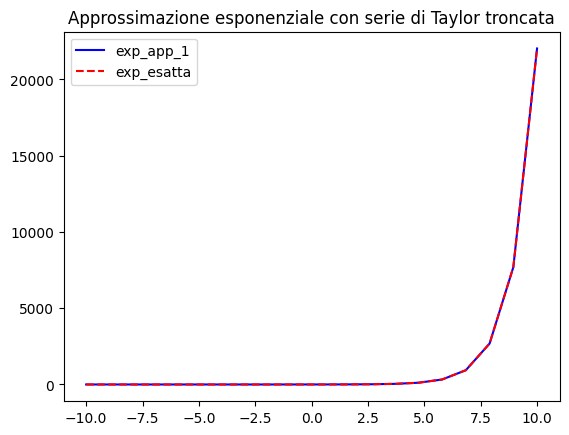

In [186]:
plt.plot(x, exp_p,'b-', x, exp_es, 'r--')
plt.title('Approssimazione esponenziale con serie di Taylor troncata')
plt.legend(['exp_app_1','exp_esatta'])
plt.show()

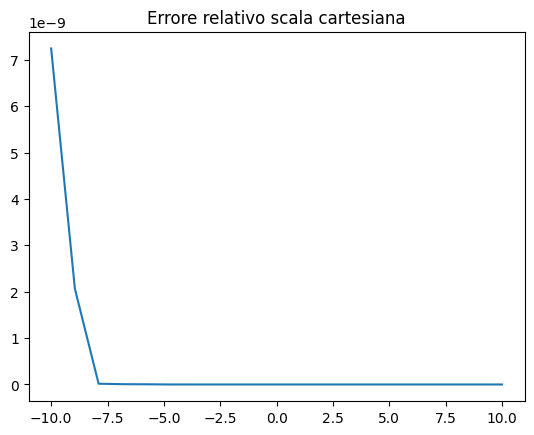

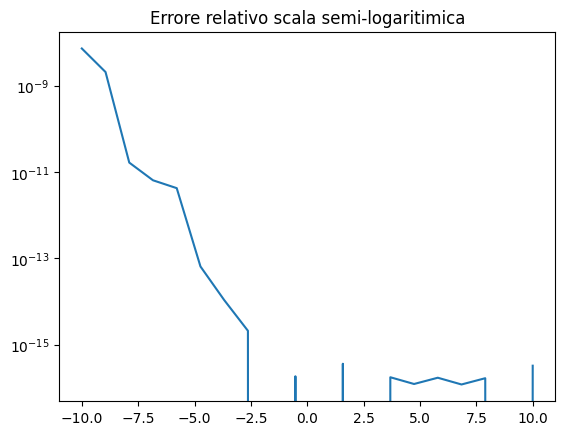

In [187]:
plt.plot(x,err_rel)
plt.title("Errore relativo scala cartesiana")
plt.show()

plt.plot(x,err_rel)
plt.yscale("log")
plt.title("Errore relativo scala semi-logaritimica")
plt.show()

[1.49257138e-16 4.16747507e-16 1.45452411e-16 0.00000000e+00
 1.41744670e-16 1.97885806e-16 1.38131444e-16 0.00000000e+00
 5.38441294e-16 0.00000000e+00 0.00000000e+00 3.66270620e-16
 0.00000000e+00 1.78466991e-16 2.49152820e-16 0.00000000e+00
 1.21400822e-16 1.69484322e-16 1.18306182e-16 3.30327965e-16]


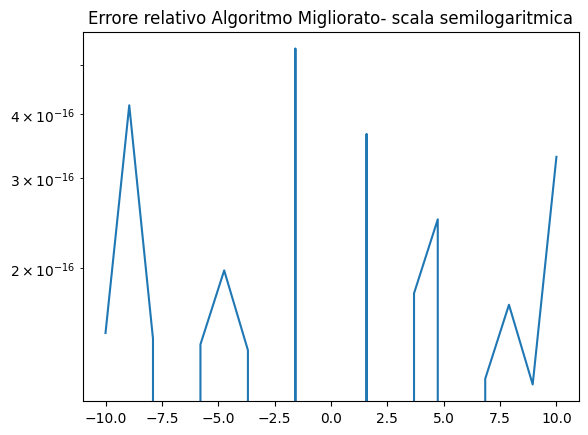

In [188]:
for i in range(ncamp) :
       exp_p[i]= taylor_stabile(x[i],n)
   

err_rel_2=np.abs(exp_p-exp_es)/np.abs(exp_es)
print(err_rel_2)
plt.plot(x,err_rel_2)
plt.yscale("log")
plt.title('Errore relativo Algoritmo Migliorato- scala semilogaritmica')
plt.show()